In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 1. Read the dataset to python environment.


In [2]:
df=pd.read_excel(r'C:\Users\user\Downloads\iris.xls')

### 2. Do the necessary pre-processing steps.

In [3]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [7]:
df.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [8]:
df['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

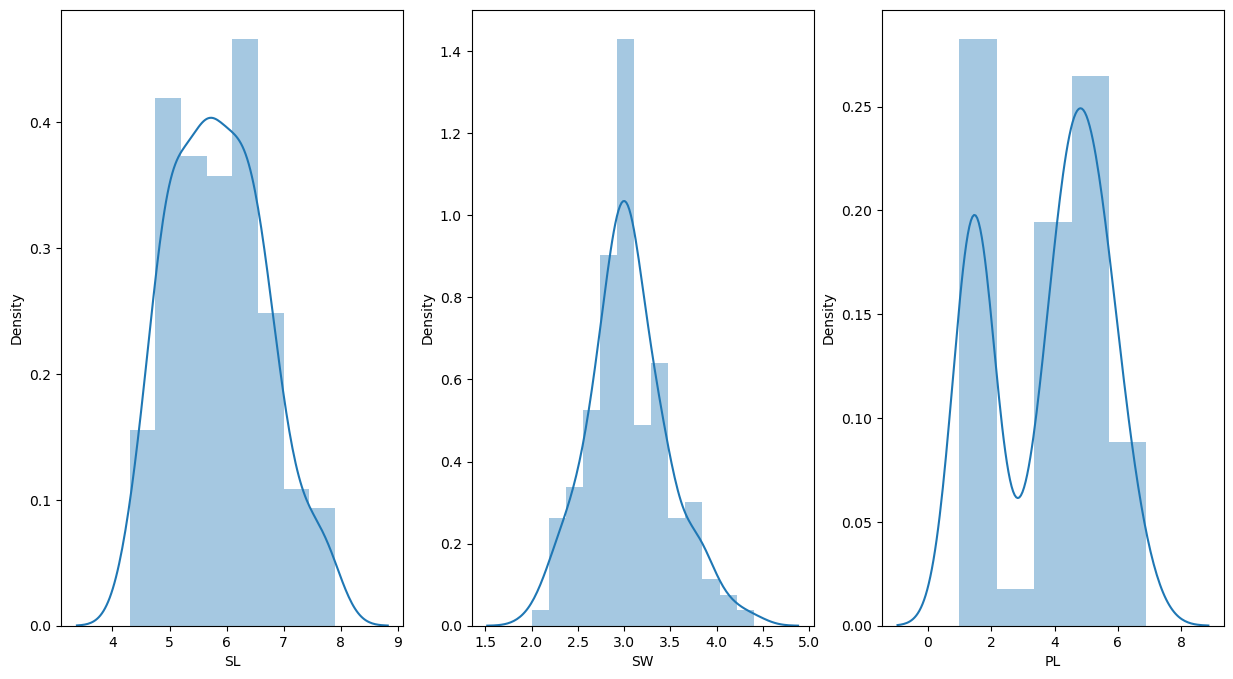

In [9]:
#Checking the distribution to decide whether mean or median to use to fill the missing values.
fig=plt.subplots(figsize=(15,8))    
plt.subplot(1,3,1)
sns.distplot(df['SL'])
plt.subplot(1,3,2)
sns.distplot(df['SW'])
plt.subplot(1,3,3)
sns.distplot(df['PL'])
plt.show()

In [10]:
# filling SL and PL column with median as both does not have a normal distribution.
df['SL']=df['SL'].fillna(df['SL'].median())
df['PL']=df['PL'].fillna(df['PL'].median())

In [11]:
#fill SW with mean value as it has a normal distribution.
df['SW']=df['SW'].fillna(df['SW'].mean())

In [12]:
df.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

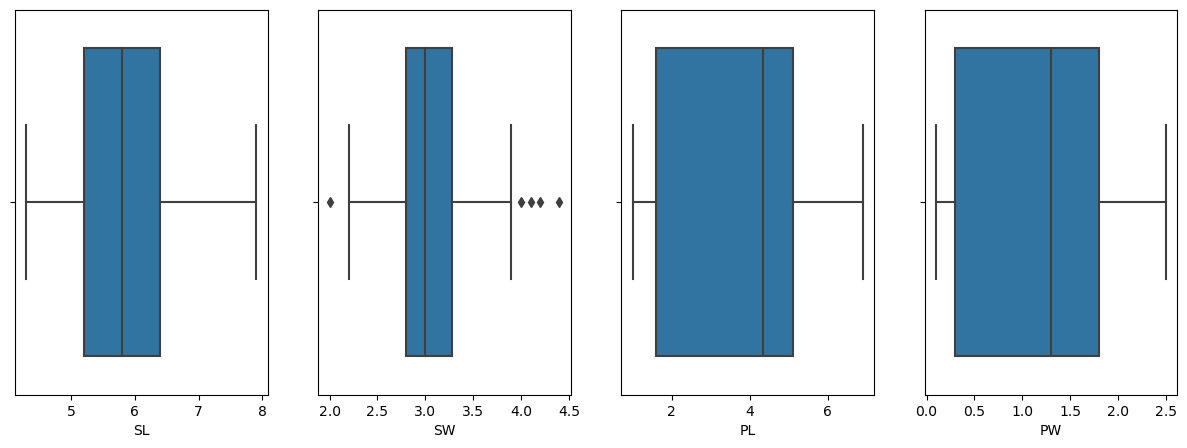

In [13]:
#Check for any Outliers in dataset using Boxplot

fig=plt.subplots(figsize=(15,5))
plt.subplot(1,4,1)
sns.boxplot(df['SL'],data=df)
plt.subplot(1,4,2)
sns.boxplot(df['SW'],data=df)
plt.subplot(1,4,3)
sns.boxplot(df['PL'],data=df)
plt.subplot(1,4,4)
sns.boxplot(df['PW'])

plt.show()


In [14]:
#Handling outliers in SW using Quantile method

Q1=np.percentile(df['SW'],25,interpolation='midpoint')
Q2=np.percentile(df['SW'],50,interpolation='midpoint')
Q3=np.percentile(df['SW'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [15]:
IQR=Q3-Q1
IQR

0.4500000000000002

In [16]:
low_lmt=Q1-(1.5*IQR)
up_lmt=Q3+(1.5*IQR)

In [17]:
outlier=[]
for x in df['SW']:
    if((x>up_lmt) or (x< low_lmt)):
        outlier.append(x)
print(outlier)

[4.0, 4.4, 4.1, 4.2, 2.0]


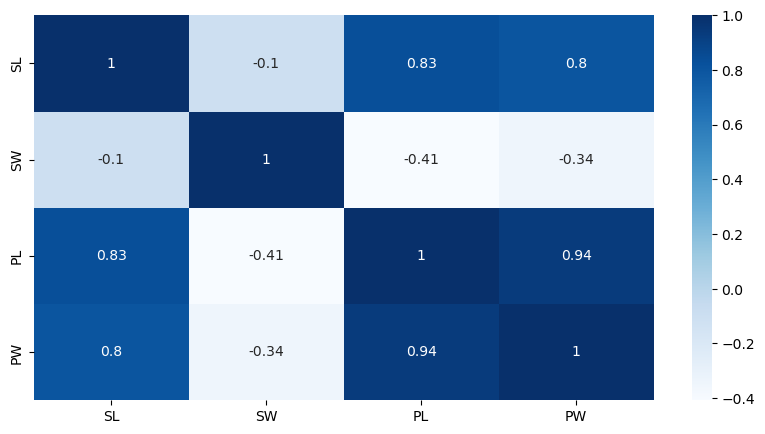

In [19]:
#Checking the correlation 
cor=df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(cor,annot=True,cmap='Blues')
plt.show()

###### Highest correlation value is 0.94(PL & PW) & Lowest correlation value is -0.41(SW & PW)Highest correlation value is 0.94(PL & PW) & Lowest correlation value is -0.41(SW & PW)

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64


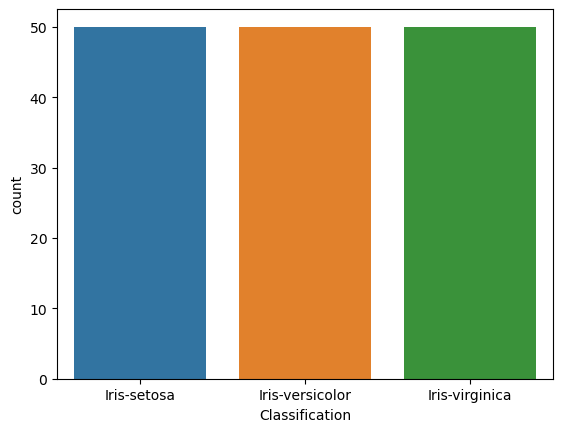

In [20]:
sns.countplot(df["Classification"])
print(df.Classification.value_counts())

#### Encoding Classification column

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le=LabelEncoder()
df['Classification']=le.fit_transform(df['Classification'])

In [25]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 3. Find out which classification model gives the best result.

In [27]:
#Splitting the data

y=df['Classification']
x=df.drop('Classification',axis=1)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=42)

### Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [34]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr_model=lr.fit(x_train,y_train)
y_pred=lr_model.predict(x_test)

In [35]:
# Evaluation metrics
from sklearn.metrics import accuracy_score
print(' The accuracy of logistic regression is:',accuracy_score(y_test,y_pred))

 The accuracy of logistic regression is: 1.0


### KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
# Finding k value

metric_k=[]
neighbors=range(1,10)

for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier=classifier.fit(x_train,y_train)
    y_pred_kNN=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred_kNN)
    metric_k.append(acc)

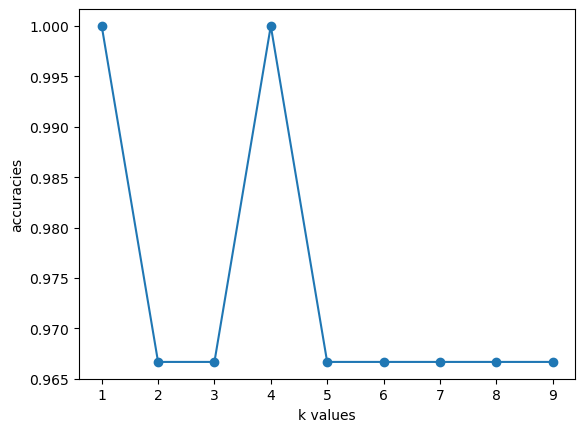

In [39]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k values')
plt.ylabel('accuracies')
plt.grid
plt.show()

In [40]:
classifier=KNeighborsClassifier(n_neighbors=4)
classifier=classifier.fit(x_train,y_train)
y_pred_kNN=classifier.predict(x_test)
print(' The accuracy of kNN is:',accuracy_score(y_test,y_pred_kNN))

 The accuracy of kNN is: 1.0


### SVM 

In [41]:
from sklearn.svm import SVC

In [42]:
svm_clf=SVC(kernel='linear')
svm_clf=svm_clf.fit(x_train,y_train)
y_pred_svm=svm_clf.predict(x_test)
print(' The accuracy of SVM is:',accuracy_score(y_test,y_pred_svm))

 The accuracy of SVM is: 1.0


In [43]:
svm_clf=SVC(kernel='rbf')
svm_clf=svm_clf.fit(x_train,y_train)
y_pred_svm=svm_clf.predict(x_test)
print(' The accuracy of SVM is:',accuracy_score(y_test,y_pred_svm))

 The accuracy of SVM is: 1.0


### Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
dt_clf=DecisionTreeClassifier()
dt_clf=dt_clf.fit(x_train,y_train)
y_pred_dt=dt_clf.predict(x_test)
print(' The accuracy of Decision tree is:',accuracy_score(y_test,y_pred_dt))

 The accuracy of Decision tree is: 1.0


### Random forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rf_clf=RandomForestClassifier()
rf_clf=rf_clf.fit(x_train,y_train)
y_pred_rf=rf_clf.predict(x_test)
print(' The accuracy of Random forest is:',accuracy_score(y_test,y_pred_rf))

 The accuracy of Random forest is: 1.0


### Comparing classification algorithms

In [50]:
from sklearn.metrics import accuracy_score, log_loss
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
                  ]

In [51]:
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)
 
for clf in classifiers:
    clf.fit(x_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(x_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    log_entry = pd.DataFrame([[name, acc*100, 11]], columns=log_cols)
    log = log.append(log_entry)
    
    print("="*30)

LogisticRegression
****Results****
Accuracy: 100.0000%
KNeighborsClassifier
****Results****
Accuracy: 96.6667%
SVC
****Results****
Accuracy: 100.0000%
DecisionTreeClassifier
****Results****
Accuracy: 100.0000%
RandomForestClassifier
****Results****
Accuracy: 100.0000%


### Here we understand that all the classification models(Logistic Regression , SVM , Decision Tree, Random Forest) except kNN model gives 100% accuracy score for the model. For kNN Model, we are getting low accuracy score ie, 96.67% when compared with other models.